## Import Libraries 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [17]:
df = pd.read_csv("mail_data.csv")

df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Replace the null values with the null string

In [18]:
mail_data = df.fillna('')

In [19]:
mail_data.tail(5)

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


## Checking the No of Rows & Columns

In [20]:
mail_data.shape

(5572, 2)

## Label_Encoding

In [21]:
mail_data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
LB = LabelEncoder()

mail_data['Category'] = LB.fit_transform(mail_data['Category'])

In [24]:
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Plot the distribution of categories

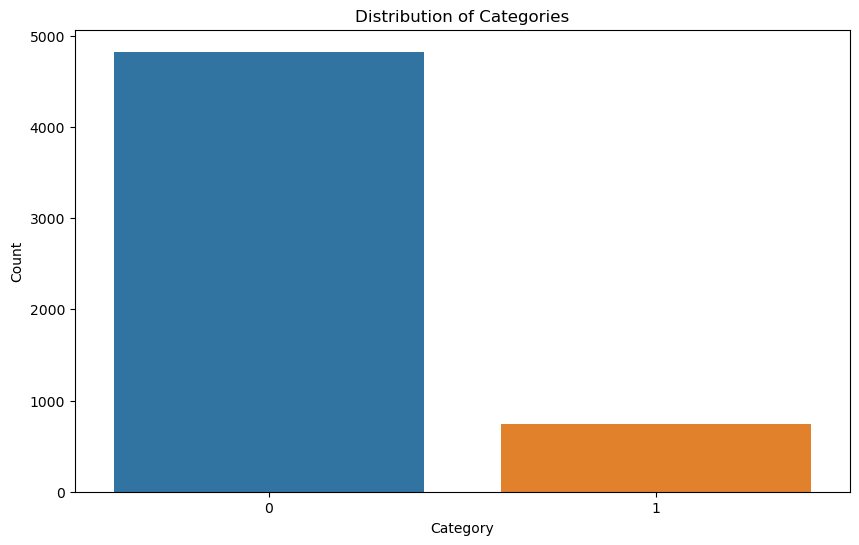

In [41]:

plt.figure(figsize=(10, 6))
sns.countplot(data=mail_data, x='Category')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Defining Features and Target Variable

In [25]:
X = mail_data['Message']

y = mail_data['Category']

## Splitting Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

## Feature Extraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with correct parameter
feature_extraction = CountVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit and transform the training data
X_train_features = feature_extraction.fit_transform(X_train)

# Transform the test data
X_test_features = feature_extraction.transform(X_test)



## Training the Model

In [28]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train_features , y_train)

LogisticRegression()

## Model Accuracy: Training and Testing Scores

In [29]:
train_score = LR.score(X_train_features, y_train) * 100
test_score = LR.score(X_test_features, y_test) * 100

In [30]:
print(f"Train Score: {train_score:.2f}%")
print(f"Test Score: {test_score:.2f}%")

Train Score: 99.51%
Test Score: 98.39%


## Plot training and testing accuracy

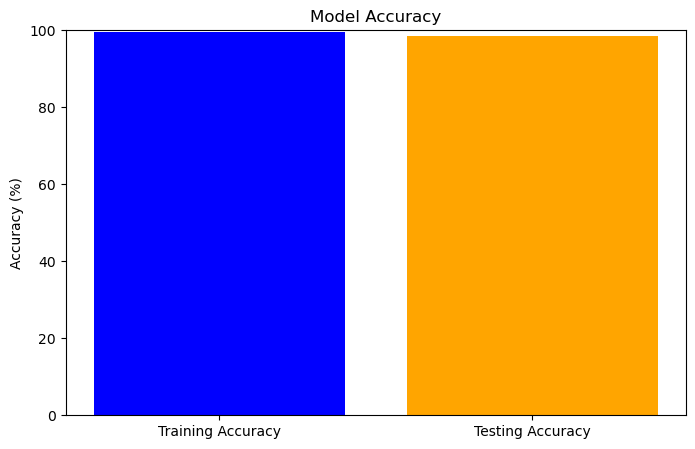

In [34]:
plt.figure(figsize=(8, 5))
bars = ['Training Accuracy', 'Testing Accuracy']
values = [train_score, test_score]

plt.bar(bars, values, color=['blue', 'orange'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 100])
plt.show()


## Model Error Metrics: MSE and MAE

In [31]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

mse = mean_squared_error(y_test, LR.predict(X_test_features))
mae = mean_absolute_error(y_test, LR.predict(X_test_features))

In [32]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.02
Mean Absolute Error: 0.02


## Plot MSE and MAE

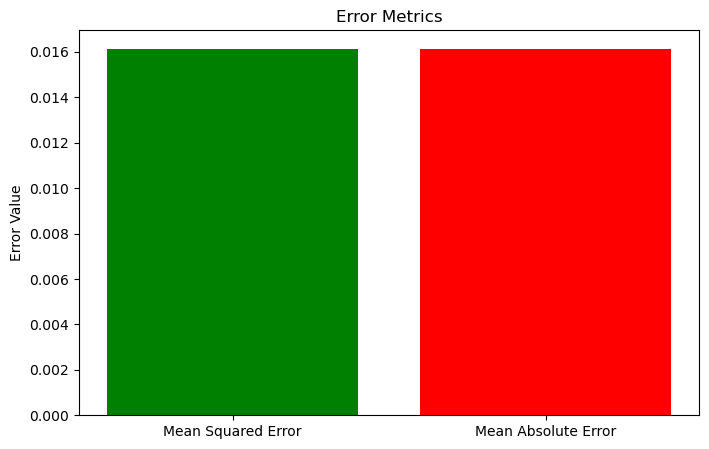

In [33]:
plt.figure(figsize=(8, 5))
error_metrics = ['Mean Squared Error', 'Mean Absolute Error']
values = [mse, mae]

plt.bar(error_metrics, values, color=['green', 'red'])
plt.title('Error Metrics')
plt.ylabel('Error Value')
plt.show()


## Prediction

In [36]:
y_pred = LR.predict(X_test_features)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Scatter Plot of Predictions vs Actual Values

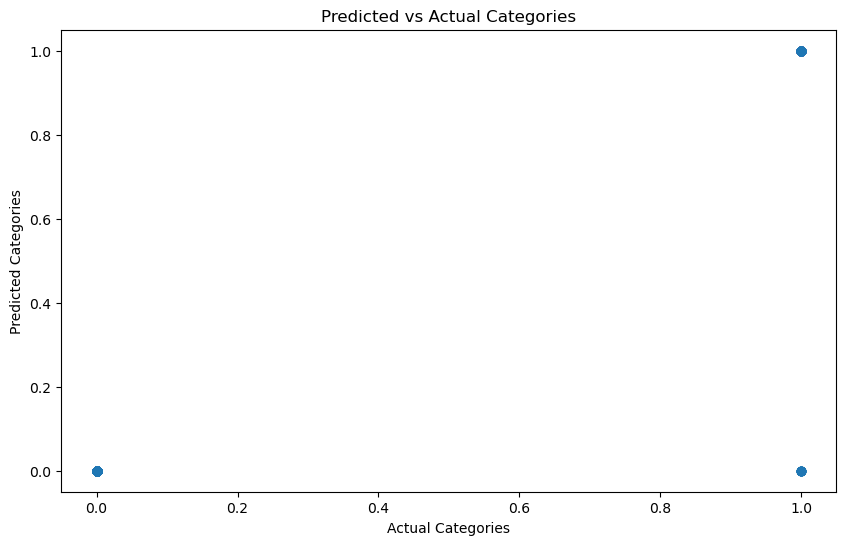

In [37]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Categories')
plt.xlabel('Actual Categories')
plt.ylabel('Predicted Categories')
plt.show()


## How we Predict New Data 

In [ ]:
new_data = ["WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

new_data

## Transformed Feature_Extraction for New Data

In [ ]:
new_data_features = feature_extraction.transform(new_data)

new_data_features

 ## Prediction for Transformed New Data

In [ ]:
LR.predict(new_data_features)

# *Thank YOU To All Follow My GitHub Account @ZeshanFareed*